## Latent Distribution Two-Graph Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8888)

from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

### Generate a stochastic block model graph

We generate a stochastic block model graph (SBM), which is shown below.

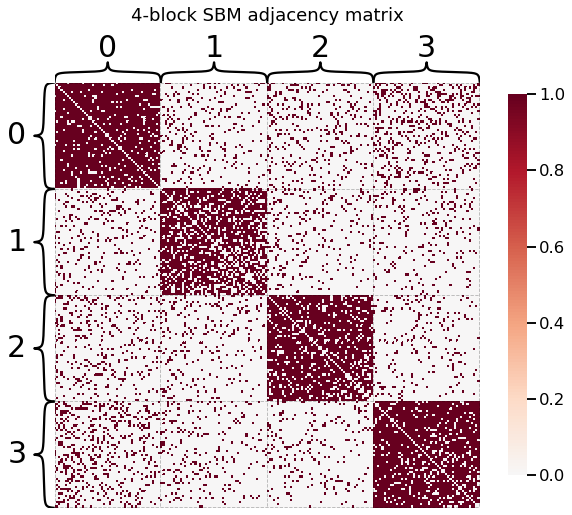

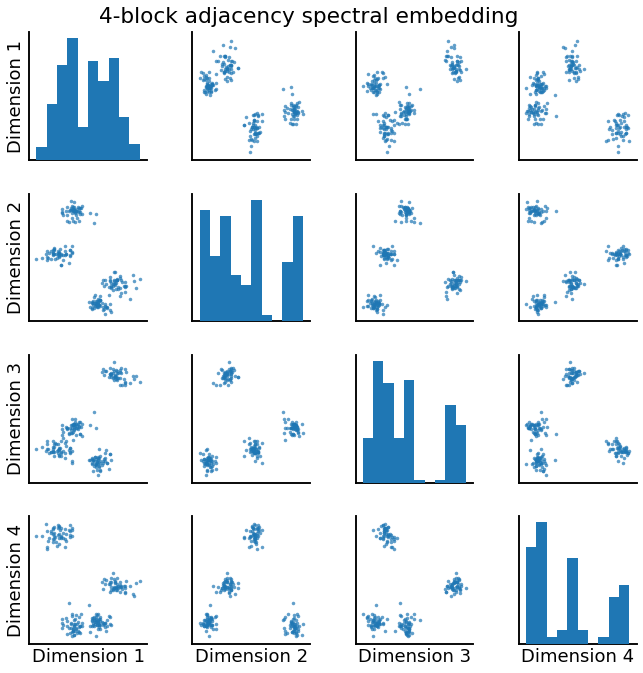

In [2]:
n_components = 4 # the number of embedding dimensions for ASE
n_verts = 50
labels_sbm = n_verts * [0] + n_verts * [1] + n_verts * [2] + n_verts * [3]
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
csize = [50] * 4
A = sbm(csize, P)
X = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A)
heatmap(A, title='4-block SBM adjacency matrix', inner_hier_labels=labels_sbm)
pairplot(X, title='4-block adjacency spectral embedding')

### Latent distribution test where null is true
Now, we want to know whether the above two graphs were generated from the same latent position. We know that they were, so the test should predict that the differences between SBM 1 and 2 (up to a rotation) are no greater than those differences observed by chance.

In other words, we are testing

\begin{align*}
H_0:&X_1 = X_2\\
H_\alpha:& X_1 \neq X_2
\end{align*}

and want to see that the p-value for the unmatched test is high (fail to reject the null)

We generate a second SBM in the same way, and run an unmatched test on it, generating a distance between the two graphs as well as a null distribution of distances between permutations of the graph. We can see this below.

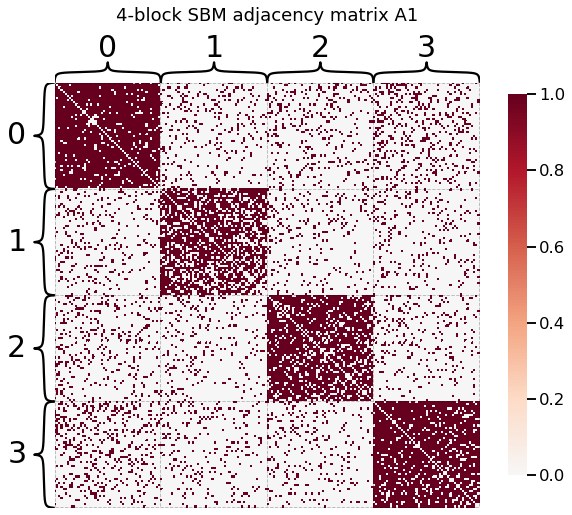

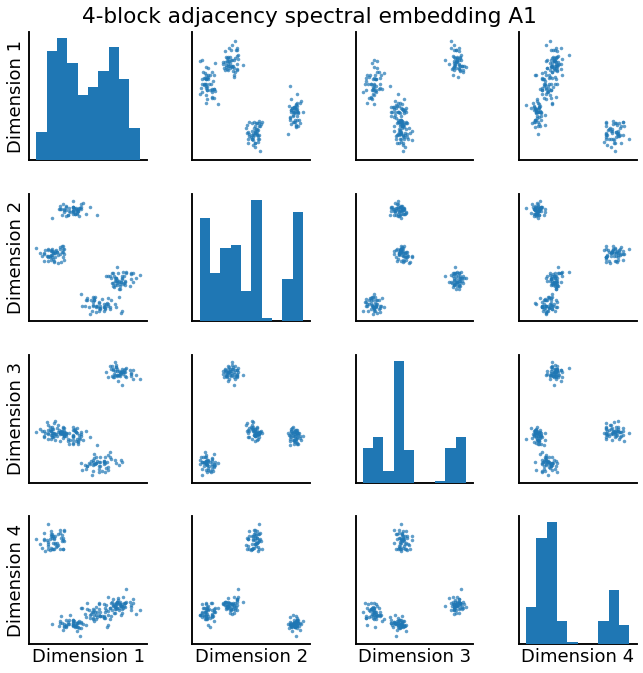

In [4]:
A1 = sbm(csize, P)
heatmap(A1, title='4-block SBM adjacency matrix A1', inner_hier_labels=labels_sbm)
X1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
pairplot(X1, title='4-block adjacency spectral embedding A1')

### Plot of Null Distribution

We plot the null distribution shown in blue and the test statistic shown red vertical line. We see that the test static is small, resulting in p-value of 0.94. Thus, we cannot reject the null hypothesis that the two graphs come from the same generating distributions.

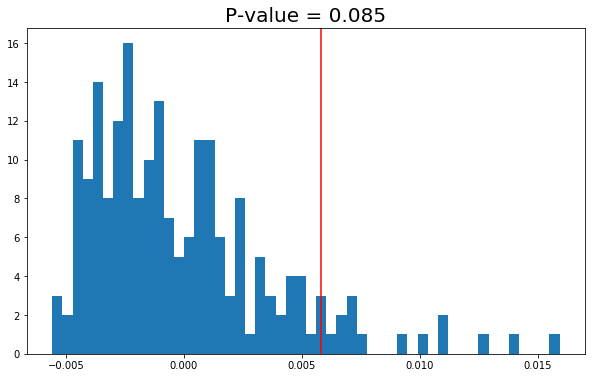

In [5]:
ldt = LatentDistributionTest()
p = ldt.fit(A, A1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ldt.null_distribution_, 50)
ax.axvline(ldt.sample_T_statistic_, color='r')
ax.set_title("P-value = {}".format(p), fontsize=20)
plt.show();

### Latent distribution test where null is false

We generate a seconds SBM with different block probabilities, and run a latent distribution test comaring the previous graph with the new one.

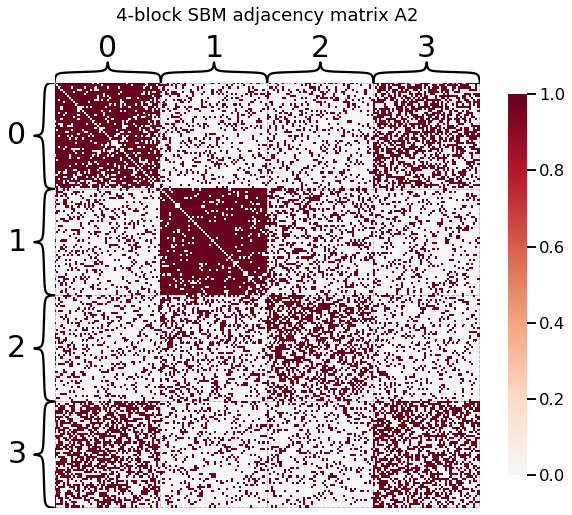

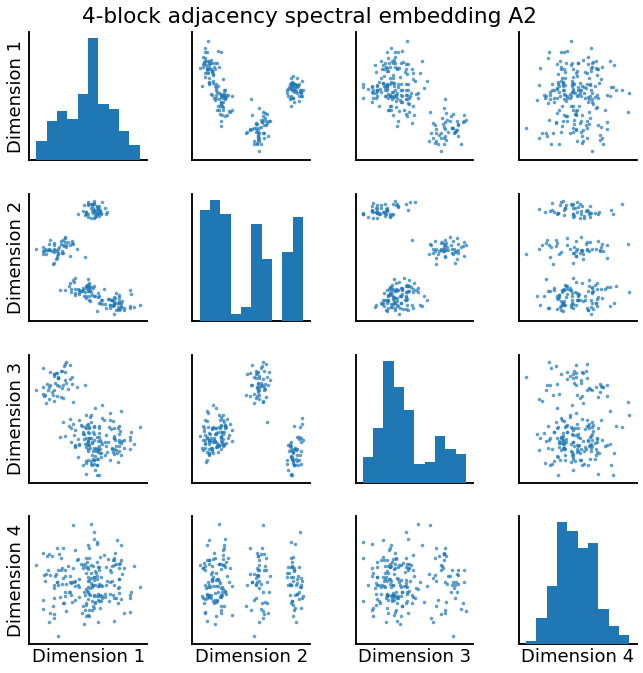

In [6]:
P2 = np.array([[0.8, 0.2, 0.2, 0.5],
              [0, 0.9, 0.3, 0.2],
              [0, 0, 0.5, 0.2],
              [0, 0, 0, 0.5]])

P2 = symmetrize(P2)
A2 = sbm(csize, P2)
heatmap(A2, title='4-block SBM adjacency matrix A2', inner_hier_labels=labels_sbm)
X2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)
pairplot(X2, title='4-block adjacency spectral embedding A2')

### Plot of Null Distribution

We plot the null distribution shown in blue and the test statistic shown red vertical line. We see that the test static is small, resulting in p-value of 0. Thus, we reject the null hypothesis that the two graphs come from the same generating distributions.

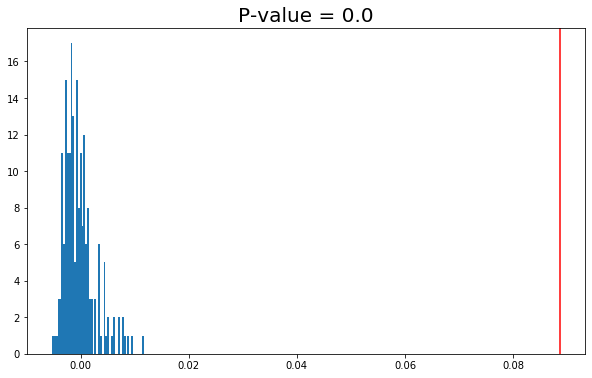

In [9]:
ldt = LatentDistributionTest()
p = ldt.fit(A, A2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ldt.null_distribution_, 50)
ax.axvline(ldt.sample_T_statistic_, color='r')
ax.set_title("P-value = {}".format(p), fontsize=20)
plt.show();